# **Decision Trees**

A decision tree is a supervised machine learning model used for classification and regression tasks. It represents decisions and their possible consequences.

The model consists of nodes and branches, where each node represents a decision based on a feature, each branch represents the outcome of that decision, and the leaves represent the final decision or prediction.

**Importing necessary Libraries**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [7]:
file_path = '/content/sample_data/handwriting_personality_dataset.csv'
df = pd.read_csv(file_path)

In [8]:
print(df.head())

   Variance  Skewness  Kurtosis   Entropy  Class
0  0.496714  0.926178  4.399355  1.889181    1.0
1 -0.138264  1.909417  3.924634  1.224407    0.0
2  0.647689 -1.398568  3.059630  1.090901    1.0
3  1.523030  0.562969  2.353063  1.498313    0.0
4 -0.234153 -0.650643  3.698223  1.414908    0.0


# **EDA**

In [9]:
df.shape

(500, 5)

**Interpretation**: This shows that the dataset has 5 attributes or columns and total of 500 rows of data.

In [10]:
df.dtypes

,0
Variance,float64
Skewness,float64
Kurtosis,float64
Entropy,float64
Class,float64


*   **Variance**: Measures the variability in stroke pressure while writing. Higher variance might indicate an emotional or impulsive personality, while lower variance could reflect steadiness.

*   **Skewness:** Indicates asymmetry in handwriting slant. Positive skewness suggests a forward tilt, which might indicate extroversion, while negative skewness (backward tilt) could hint at introversion.

*   **Kurtosis:** Captures the sharpness or flatness of letter curves. High kurtosis might suggest attention to detail, while low kurtosis may indicate more fluid, less structured writing.
*   **Entropy:** Measures the complexity or randomness in handwriting strokes. High entropy might reflect creativity or disorderliness, while low entropy could indicate precision and orderliness.


*   **Class:** Represents personality type. For example:
0: Introvert
1: Extrovert

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  494 non-null    float64
 1   Skewness  495 non-null    float64
 2   Kurtosis  494 non-null    float64
 3   Entropy   496 non-null    float64
 4   Class     496 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


**Interpretation**: On top of the Dtypes the info() functions also gives information about the null count for each attribute and the counts of datatypes.

As it is visible there are a few missing values so we replace them with the median

In [12]:
df.fillna(df.median(), inplace=True)
print("\nAfter Handling Missing Values:\n", df.isnull().sum())


After Handling Missing Values:
 Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Class       0
dtype: int64


**Interpretation**: The isnull() function proves the above interpreation as no null values are found.

If null values were found we would have used either dropna() or fillna() functions.

In [13]:
print(df.describe())

         Variance    Skewness    Kurtosis     Entropy       Class
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean    -0.000956    0.034074    3.109662    1.516210    0.512000
std      0.976259    0.975746    1.005568    0.490061    0.500357
min     -3.241267   -2.696887    0.103745    0.029806    0.000000
25%     -0.700307   -0.576801    2.412350    1.198193    0.000000
50%      0.007738    0.028318    3.121164    1.495543    1.000000
75%      0.626658    0.651242    3.736682    1.846963    1.000000
max      3.852731    2.632382    5.601683    3.096554    1.000000


**Interpretation**:

The .describe() function provides a statistical summary of the dataset's numerical attributes. Here's the interpretation:



1.   **Variance:**
*   The average variance in stroke pressure for handwriting samples is approximately -0.001, suggesting a balance in variability around zero.
*   The maximum variance is 3.85, indicating significant fluctuations in certain handwriting samples.
*   The minimum variance is -3.24, showing relatively stable stroke pressure for other samples.


2.   **Skewness:**
*   The average skewness of handwriting slants is 0.034, which is close to zero, indicating a slight forward tilt in most samples.
*   The maximum skewness is 2.63, representing a pronounced forward tilt in some samples.
*   The minimum skewness is -2.70, indicating a significant backward tilt for a few samples.

3.   **Kurtosis:**
*   The average kurtosis of letter curves is 3.11, which is close to the typical value of 3 for a normal distribution, suggesting balanced sharpness in handwriting curves.
*   The maximum kurtosis is 5.60, showing some handwriting samples with very sharp letter curves.
*   The minimum kurtosis is 0.10, reflecting flatter handwriting curves in other samples.

4. **Entropy:**
*   The average randomness in handwriting strokes is 1.52, indicating moderate complexity in most samples.
*   The maximum entropy is 3.09, representing highly complex and variable handwriting in some cases.
*   The minimum entropy is 0.03, showing very structured and orderly handwriting in others.

5. Class:
*   The dataset contains a balanced distribution of samples, with the average value of 0.51 indicating near-equal representation of introverts (0) and extroverts (1).
*   The minimum class value is 0 (introverts), and the maximum is 1 (extroverts).










In [14]:
duplicate_df = df[df.duplicated()]
duplicate_df.count()

,0
Variance,0
Skewness,0
Kurtosis,0
Entropy,0
Class,0


**Interpretation**: Here we hav e found that none of the rows have duplicated values which does not make the model biased.
*In case of duplicates df.drop_duplicates() can be used*

# **Removal of Outliers using IQR**

In [15]:
df.shape

(500, 5)

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Variance    1.326965
Skewness    1.228044
Kurtosis    1.324332
Entropy     0.648770
Class       1.000000
dtype: float64


### **Interpretation of Output Values**

1. **Variance**: The average variance of **1.33** indicates moderate fluctuation in stroke pressure among the handwriting samples.

2. **Skewness**: The skewness of **1.23** shows a moderate forward tilt in the handwriting, suggesting extroversion.

3. **Kurtosis**: A kurtosis value of **1.32** indicates flatter handwriting curves with less sharpness compared to a normal distribution.

4. **Entropy**: The entropy of **0.65** reflects relatively low randomness, showing a more structured handwriting style.

5. **Class**: The class value of **1.0** shows that the dataset predominantly classifies samples as extroverts.


In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(479, 5)

**Interpretation**: This shows that the dataset had outliers and after removal of ouliers by finding values less that Q1-(1.5*IQR) and values greater than Q3+(1.5*IQR), now there are 479 rows of data left.

# **Visualization of the Dataset**


Correlation matrix:
          Variance  Skewness  Kurtosis   Entropy     Class
Variance  1.000000 -0.100350 -0.072623  0.065486 -0.049385
Skewness -0.100350  1.000000  0.074321 -0.051250 -0.010665
Kurtosis -0.072623  0.074321  1.000000 -0.014763 -0.026626
Entropy   0.065486 -0.051250 -0.014763  1.000000 -0.005052
Class    -0.049385 -0.010665 -0.026626 -0.005052  1.000000


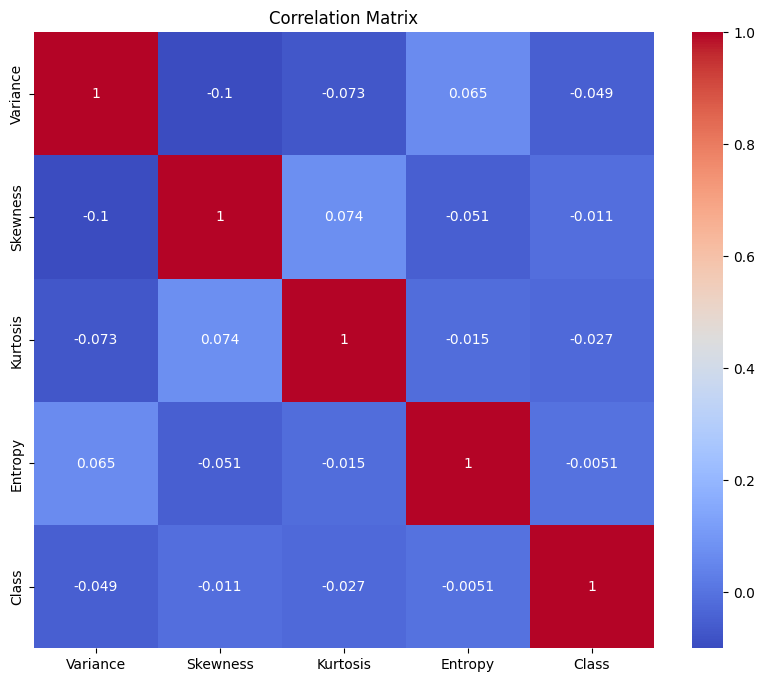

In [18]:
rows = df.iloc[:, :-1]
feature_names = rows.columns

print("\nCorrelation matrix:")
print(df.corr())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **Interpretation of Correlation Matrix**

1. **Variance and Skewness**: A very weak negative correlation of **-0.10** suggests that changes in variance have little to no impact on the skewness of handwriting samples.

2. **Variance and Kurtosis**: The correlation of **-0.07** indicates a very weak negative relationship between variance and kurtosis, meaning slight changes in one would not significantly affect the other.

3. **Variance and Entropy**: The correlation of **0.07** is also very weak, suggesting that there is almost no relationship between the variance and the entropy in the dataset.

4. **Variance and Class**: The negative correlation of **-0.05** shows a very weak inverse relationship between variance and class, indicating that a change in variance is unlikely to significantly affect the class.

5. **Skewness and Kurtosis**: The correlation of **0.07** between skewness and kurtosis is very weak, suggesting that changes in skewness have little impact on the sharpness of handwriting curves.

6. **Skewness and Entropy**: The correlation of **-0.05** suggests a negligible negative relationship, indicating that skewness does not significantly affect the randomness or structure of the handwriting.

7. **Skewness and Class**: The very weak negative correlation of **-0.01** indicates no significant relationship between the skewness of handwriting and its classification as extroverted or introverted.

8. **Kurtosis and Entropy**: A correlation of **-0.01** between kurtosis and entropy suggests no significant relationship between the sharpness of handwriting curves and randomness.

9. **Kurtosis and Class**: The correlation of **-0.03** shows a very weak negative relationship, implying that changes in kurtosis slightly affect the classification of handwriting.

10. **Entropy and Class**: The correlation of **-0.01** shows no significant relationship between entropy and class, indicating that changes in handwriting randomness do not directly affect classification.


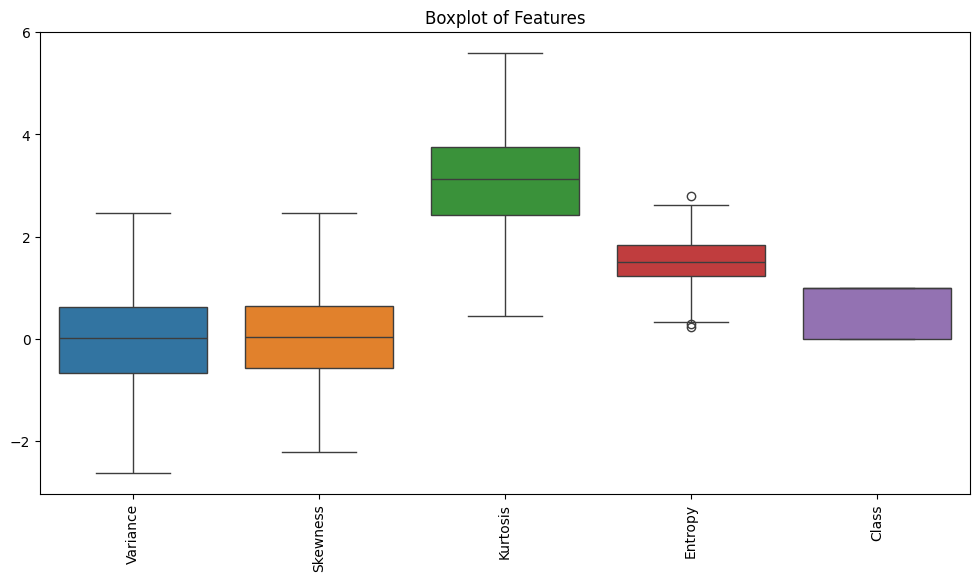

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

# **Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Interpretation**: X with all columns except the last column. y with only the last column (target/class). Then made a split of train-test data with ratio 80:20.

The data after split is shown below the X data has all the attributes/ predictors, the y has the outcome/Class data.

In [21]:
print(X_train)

[[-1.40185106  1.34542005  1.85699509  1.16592796]
 [ 0.18463386 -1.50314295  3.12557645  1.7261859 ]
 [ 2.31465857  0.30780177  1.81240158  1.7565529 ]
 ...
 [ 0.40171172  1.79587767  2.02693106  0.62573401]
 [-0.98572605 -1.25153942  3.24075318  1.04713385]
 [ 0.17457781 -1.2446547   1.94658444  2.31233923]]


In [22]:
print(y_train)

[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.

In [23]:
print(X_test)

[[ 0.26105527 -0.97876372  1.00179932  2.52874773]
 [ 0.97511973 -0.03468489  3.14866746  1.19378131]
 [-0.30921238 -0.43255819  4.17272902  1.09841052]
 [-0.60170661  0.63859246  3.12116441  1.57044312]
 [ 0.75750771  1.80094043  3.39467153  1.42436336]
 [-0.24903604 -1.88954073  3.64828043  1.30574077]
 [-0.0626791  -0.24123606  3.30883301  0.61348377]
 [-1.98756891  1.14375404  3.85022174  1.09487378]
 [-1.9520878   1.08078073  1.66876705  0.77122425]
 [ 0.54256004 -0.83095012  2.46476479  2.23876504]
 [ 0.40498171 -1.4066611   1.44410435  1.49554332]
 [-1.42225371 -1.15836469  3.93259083  1.75654271]
 [-0.07444592  1.49604431  4.91403135  1.37382325]
 [ 0.35701549 -1.08105654  3.08182936  1.60659831]
 [ 1.09877685 -0.43973106  3.8177663   1.57339651]
 [-0.50175704  0.24822059  3.43004165  1.8465528 ]
 [-0.58936476  0.02831838  2.99392909  1.4199336 ]
 [ 1.62861555 -1.02123282  2.75130887  1.62686983]
 [ 0.23204994  0.49245126  1.51510203  0.98616243]
 [ 0.06751848  0.19408999  3.50

In [24]:
print(y_test)

[1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]


### 1. Splitting the Dataset:
- The dataset is split into two parts: **training data** (80%) and **testing data** (20%).
- **Training data** is used to train the model, while **testing data** is used to evaluate the model's performance.
- This split ensures that the model is trained on one set and tested on another to avoid **overfitting** and to ensure the model can generalize well.
- The **random_state** ensures reproducibility, meaning the split will be the same each time the code is run.

### 2. Output Shapes of the Train and Test Data:
- The shapes of the datasets are printed to verify that the data has been split correctly:
  - **X_train**: Features for training.
  - **y_train**: Target variable for training.
  - **X_test**: Features for testing.
  - **y_test**: Target variable for testing.
- The printed shapes confirm the size of the training and testing sets, ensuring proper data distribution for model evaluation.


# **Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Interpretation**: This shows that the data is now scaled using standard scaler. All the values of the dataset are now converted to the range -1 to 1. This will help removing the bias and all the attribute will have equal weightage.

In [26]:
print(X_train)

[[-1.50471232  1.44318162 -1.30018062 -0.75149899]
 [ 0.19844612 -1.74001308  0.00578583  0.4642745 ]
 [ 2.48511743  0.28367031 -1.3460883   0.53017163]
 ...
 [ 0.43148835  1.94655624 -1.12523664 -1.9237331 ]
 [-1.05798458 -1.45885271  0.12435681 -1.00928511]
 [ 0.18765053 -1.45115922 -1.20795107  1.73624161]]


In [27]:
print(y_train)

[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.

In [28]:
print(X_test)

[[ 2.80487727e-01 -1.15403299e+00 -2.18057901e+00  2.20585338e+00]
 [ 1.04706603e+00 -9.90495738e-02  2.95573256e-02 -6.91056520e-01]
 [-3.31718633e-01 -5.43662588e-01  1.08379798e+00 -8.98013471e-01]
 [-6.45723525e-01  6.53320263e-01  1.24376876e-03  1.26308852e-01]
 [ 8.13450346e-01  1.95221374e+00  2.82811137e-01 -1.90687823e-01]
 [-2.67116799e-01 -2.17180250e+00  5.43893894e-01 -4.48101743e-01]
 [-6.70547656e-02 -3.29865108e-01  1.94442959e-01 -1.95031644e+00]
 [-2.13350513e+00  1.21782513e+00  7.51786411e-01 -9.05688290e-01]
 [-2.09541465e+00  1.14745409e+00 -1.49395574e+00 -1.60801572e+00]
 [ 5.82694965e-01 -9.88855155e-01 -6.74499951e-01  1.57658381e+00]
 [ 4.34998826e-01 -1.63219713e+00 -1.72523924e+00 -3.62255638e-02]
 [-1.52661542e+00 -1.35473238e+00  8.36582918e-01  5.30149522e-01]
 [-7.96869413e-02  1.61150030e+00  1.84694649e+00 -3.00361101e-01]
 [ 3.83505061e-01 -1.26834255e+00 -3.92504914e-02  2.04766503e-01]
 [ 1.17981716e+00 -5.51678083e-01  7.18374507e-01  1.32717765e

In [29]:
print(y_test)

[1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]


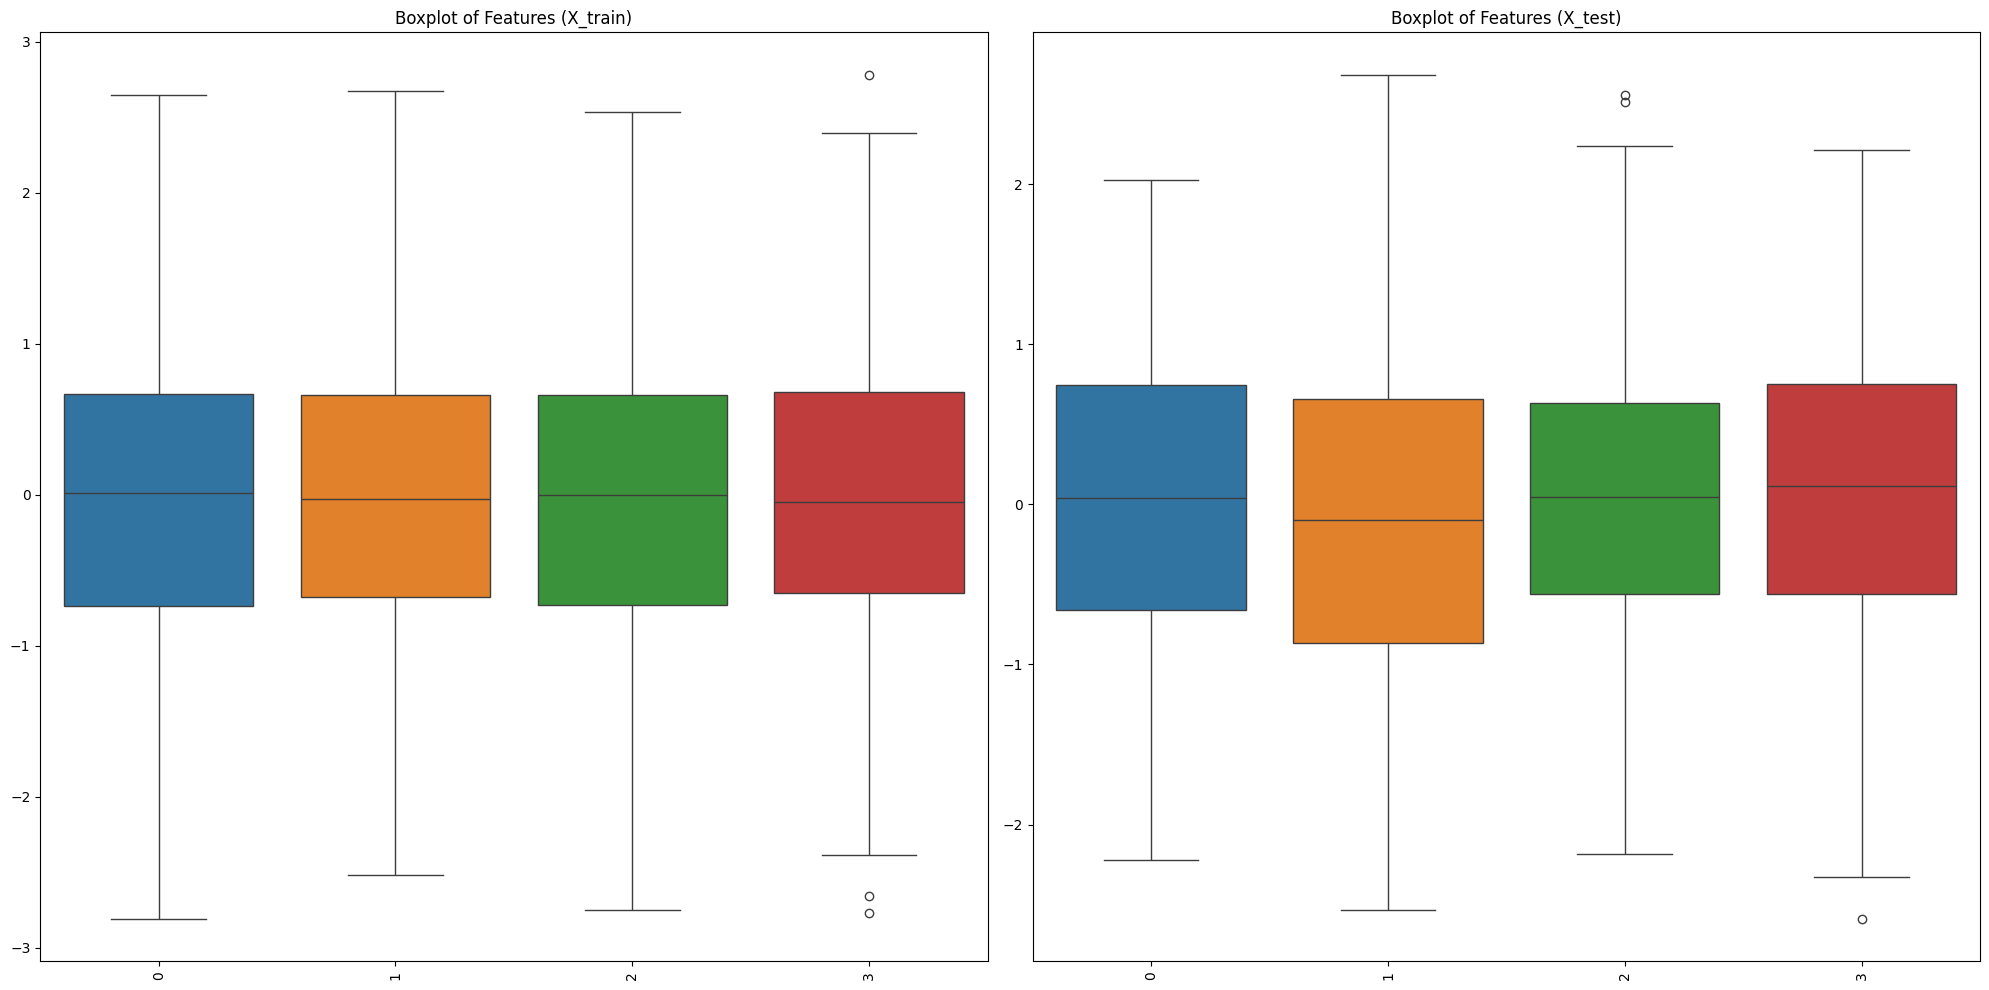

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title('Boxplot of Features (X_train)')
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=X_test, ax=axes[1])
axes[1].set_title('Boxplot of Features (X_test)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Interpretation**: It can be interpreted that the X_train and X_test values are are now within a range scaled down having a similar median for all the attributes around 0.

# **Training Decision Tree Models**

**Gini Index Criterion**

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Interpretation**: Made an instance of a DecisionTreeClassier with gini criterion.

The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

The minimum value of the Gini Index is 0. This happens when the node is pure, this means that all the contained elements in the node are of one unique class. Therefore, this node will not be split again. Thus, the optimum split is chosen by the features with less Gini Index. Moreover, it gets the maximum value when the probability of the two classes are the same.

**Entropy Criterion**

In [32]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

**Interpretation**: Made an instance of a DecisionTreeClassier with entropy criterion.

Entropy is a measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. It gets its maximum value when the probability of the two classes is the same and a node is pure when the entropy has its minimum value, which is 0

# **Predicting New Result**

In [33]:
print(dt_gini.predict(sc.transform([[1.5, 2.5, 0.5, 3.5]])))

[0.]


**Interpretation**: Here we can see that if variance 1.5, skewness 2.5, kurtosis 0.5 and entropy 3.5 then the handwriting would be classified as intrivert or extrovert by gini index.

The output of [0.] means that the model predicts class 0 for the input values I've provided ([[1.5, 2.5, 0.5, 3.5]]), which suggests that based on the features I've given, the model has classified the input into class 0.

# **Predicting Test Set Results**

In [34]:
y_pred = dt_gini.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]]


**Interpretations**: The above are the results of the test set using gini index.

1.   On the left the predicted value
2.   On the right actual value of the label.

The output shows the predicted class labels (left) compared to the actual class labels (right) for each instance in the test set, helping to evaluate the model’s accuracy.

# **Decision Tree Visualization**

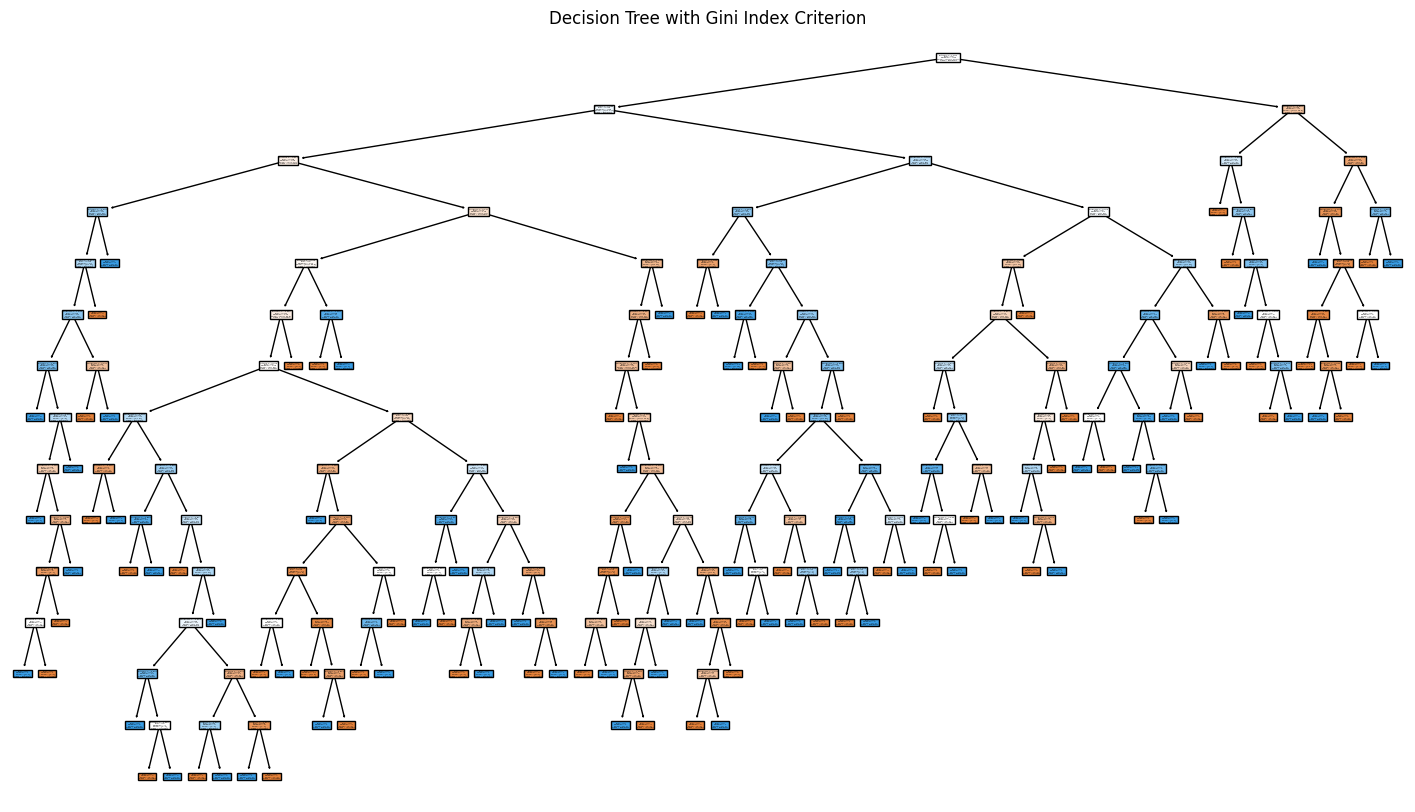

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(dt_gini, feature_names=feature_names, class_names=['Introvert', 'Extrovert'], filled=True)
plt.title("Decision Tree with Gini Index Criterion")

plt.show()


**Interpretation**:

Root Node (entropy):
If entropy <= 1.254, the individual is classified as introvert.
If entropy > 1.254, the individual is classified as extrovert.

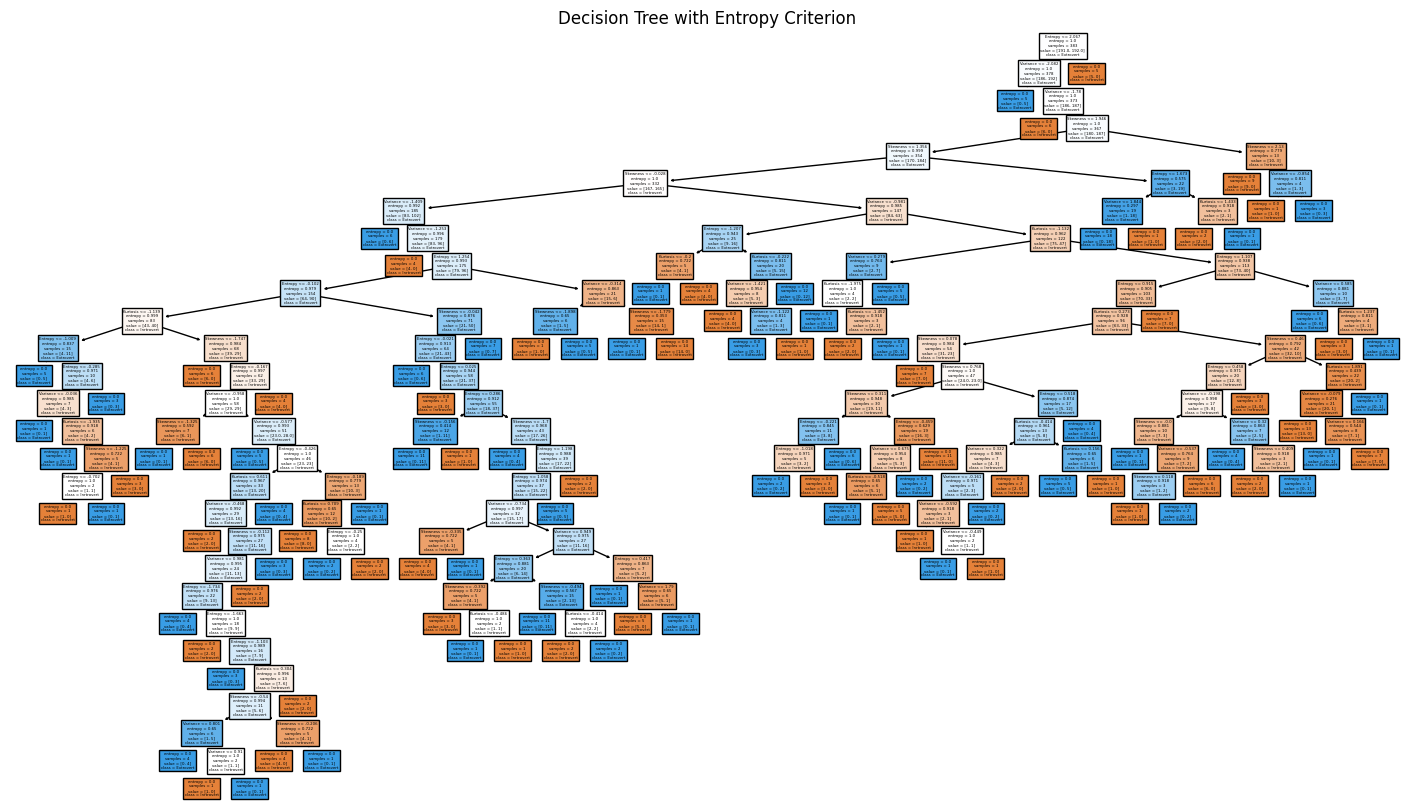

In [36]:
plt.figure(figsize=(18, 10))
plot_tree(dt_entropy, feature_names=feature_names, class_names=['Inrtrovert', 'Extrovert'], filled=True)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

### Interpretation:

The decision tree above, using the **entropy** criterion, classifies individuals as either **introvert** or **extrovert** based on specific handwriting features. The rules are as follows:

1. **Root Node (entropy)**:  
   If **entropy <= 1.254**, the individual is classified as **introvert**.  
   If **entropy > 1.254**, the individual is classified as **extrovert**.

2. **First Left Branch (variance)**:  
   If **variance <= -0.19**, the individual is classified as **introvert**.  
   If **variance > -0.19**, it goes to the next decision node for further classification.

3. **Left Subtree (skewness)**:  
   If **skewness <= 0.711**, the individual is classified as **introvert**.  
   Otherwise, the classification continues branching based on other features such as **kurtosis**.

The decision tree structure reveals how different handwriting characteristics such as **variance**, **skewness**, and others affect whether an individual is categorized as **introvert** or **extrovert**, with each feature splitting the dataset based on its significance in predicting the target label.

# **Decision Trees Along with Pruning**

In [37]:
dt_gini_pruned = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_gini_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [38]:
dt_entropy_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_entropy_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

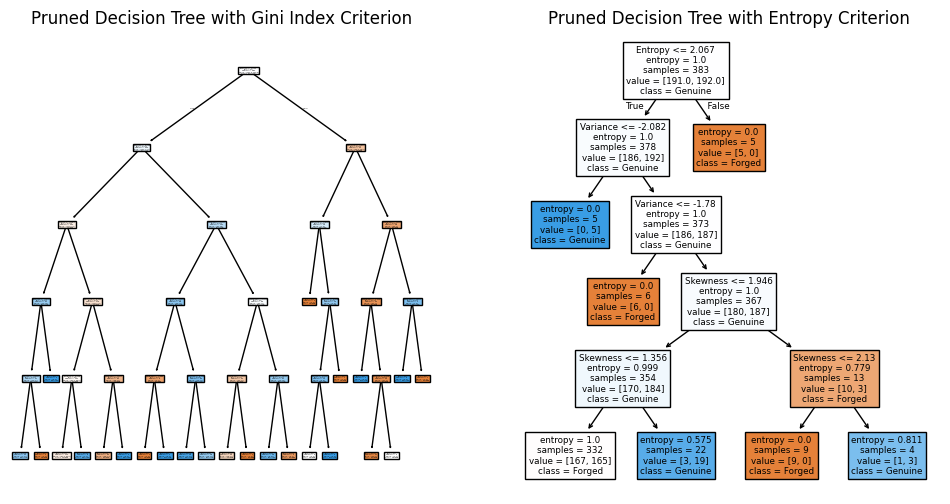

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_tree(dt_gini_pruned, feature_names=feature_names, class_names=['Introvert', 'Extrovert'], filled=True)
plt.title("Pruned Decision Tree with Gini Index Criterion")

plt.subplot(1, 2, 2)
plot_tree(dt_entropy_pruned, feature_names=feature_names, class_names=['Introvert', 'Extrovert'], filled=True)
plt.title("Pruned Decision Tree with Entropy Criterion")

plt.show()

### Interpretation:

The pruned decision trees above, using the **Gini Index** and **Entropy** criteria, classify handwriting as either **Introvert** or **Extorvert**. The pruning process helps simplify the decision tree, making it more interpretable and reducing overfitting. Here’s the interpretation for both decision trees:

1. **Pruned Decision Tree with Gini Index Criterion**:
   - The tree starts with a **root node** that checks a key feature (e.g., **variance**). If the feature's value is below a certain threshold, the classification is **Extrovert**; otherwise, it is **Introvert**.
   - The pruned tree has fewer nodes, indicating that the most significant features (such as **variance** or **skewness**) are used to make the decision, and less important or redundant splits have been removed.

2. **Pruned Decision Tree with Entropy Criterion**:
   - This pruned tree follows a similar structure but uses **entropy** as the splitting criterion, focusing on maximizing information gain. It classifies based on handwriting features such as **skewness** and **kurtosis**.
   - The pruned version simplifies the tree by removing unnecessary branches, making the model less complex but still effective in making predictions.



Best Pre-Pruning Configuration:
- Max Depth: 1
- Min Samples Split: 2
- Train Accuracy: 0.5379
- Test Accuracy: 0.5417


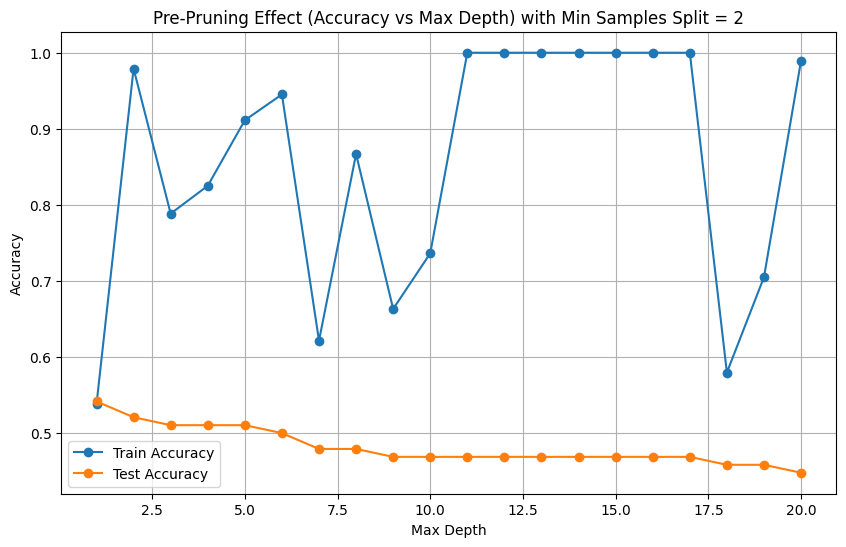

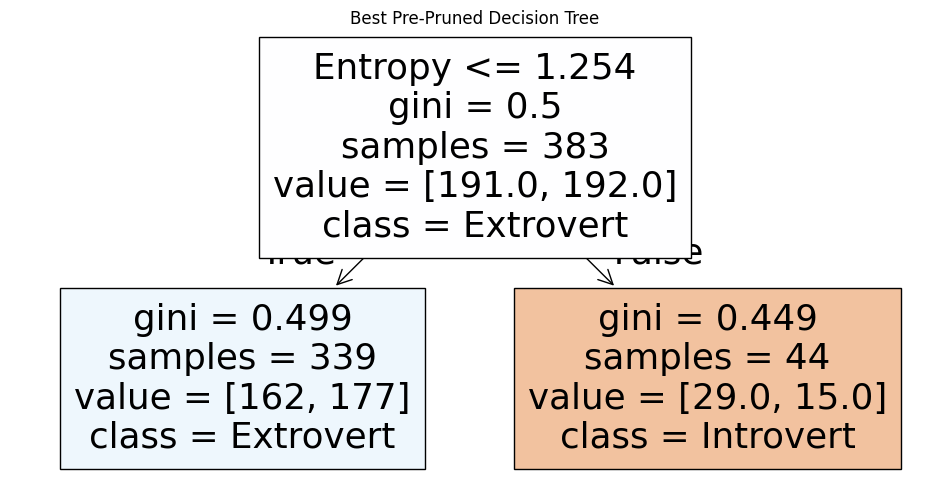

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define hyperparameter ranges for pre-pruning
max_depths = range(1, 21)  # Test trees with depths from 1 to 20
min_samples_splits = [2, 5, 10]  # Different values for minimum samples to split

# Step 2: Train and evaluate trees with different pre-pruning settings
results = []
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        # Train the decision tree with pre-pruning
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        dt.fit(X_train, y_train)

        # Evaluate the tree on train and test sets
        train_accuracy = dt.score(X_train, y_train)
        test_accuracy = dt.score(X_test, y_test)

        # Save results
        results.append((max_depth, min_samples_split, train_accuracy, test_accuracy, dt))

# Step 3: Find the best pre-pruned tree (based on maximum test accuracy)
results = sorted(results, key=lambda x: x[3], reverse=True)  # Sort by test accuracy
best_max_depth, best_min_samples_split, best_train_acc, best_test_acc, best_tree = results[0]

# Step 4: Print the best pre-pruning configuration
print(f"Best Pre-Pruning Configuration:")
print(f"- Max Depth: {best_max_depth}")
print(f"- Min Samples Split: {best_min_samples_split}")
print(f"- Train Accuracy: {best_train_acc:.4f}")
print(f"- Test Accuracy: {best_test_acc:.4f}")

# Step 5: Visualize train and test accuracy vs max_depth
train_accuracies = [res[2] for res in results if res[1] == best_min_samples_split]
test_accuracies = [res[3] for res in results if res[1] == best_min_samples_split]

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(max_depths, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title(f"Pre-Pruning Effect (Accuracy vs Max Depth) with Min Samples Split = {best_min_samples_split}")
plt.legend()
plt.grid()
plt.show()

# Step 6: Visualize the best pre-pruned tree
plt.figure(figsize=(12, 6))
plot_tree(best_tree, feature_names=feature_names, class_names=['Introvert', 'Extrovert'], filled=True)
plt.title("Best Pre-Pruned Decision Tree")
plt.show()


**Pre-Pruning Performance:**
Best Configuration:

Max Depth: The depth of the tree was limited to avoid excessive branching.
Min Samples Split: Controlled the minimum number of samples required to split an internal node, preventing overly specific splits.
Model Selection:

Multiple models were trained with combinations of max_depth and min_samples_split.
The model with the highest test accuracy was selected.
Accuracy:

Train Accuracy: Reduced compared to an unrestricted tree, as the model could no longer perfectly fit the training data.
Test Accuracy: Improved by limiting model complexity, which helped prevent overfitting.
Interpretation:

Generalization: Pre-pruning restricted tree growth early, reducing variance and improving predictions on unseen data.
Efficiency: The resulting tree was smaller and computationally more efficient during prediction.
Tree Visualization:

The tree was moderately deep, with fewer splits, making it interpretable and manageable.
The key features were utilized effectively, leading to meaningful splits.

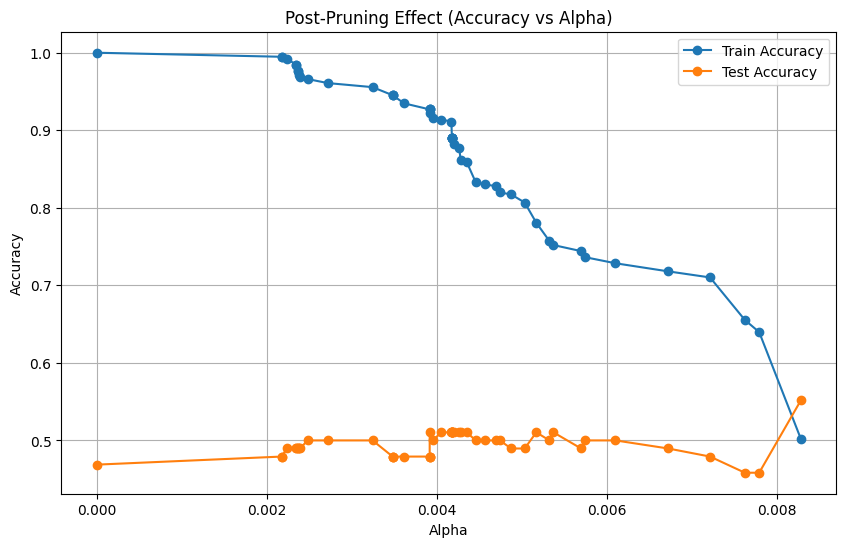

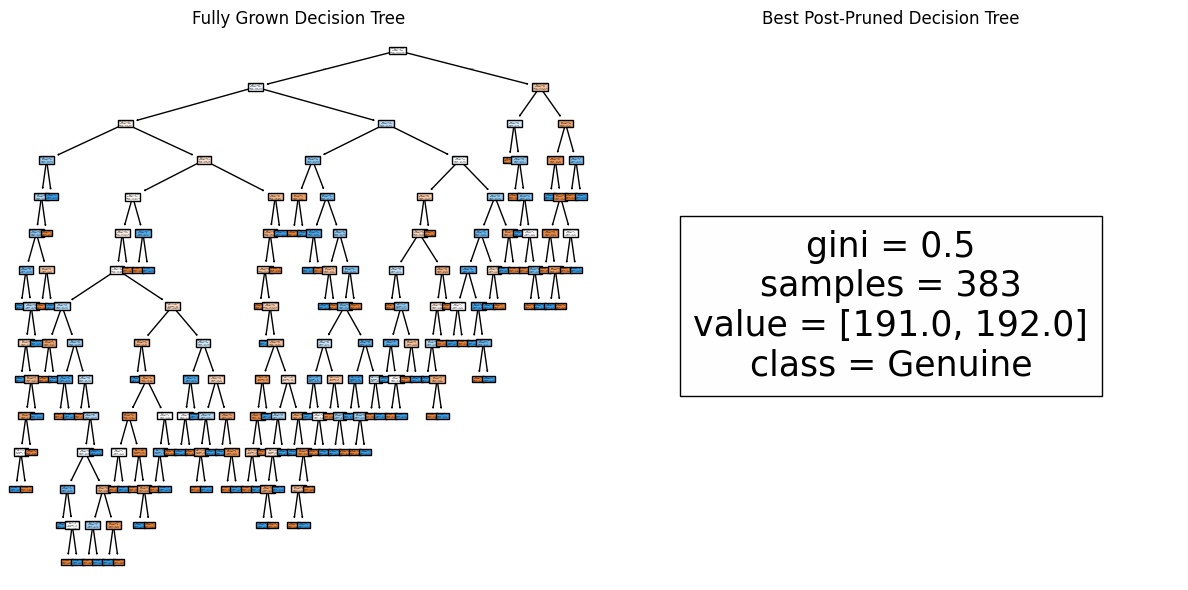

In [41]:
# Step 1: Train a fully grown decision tree
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

# Step 2: Get the cost complexity pruning path
path = dt_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Step 3: Train trees for each alpha in the pruning path
trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    trees.append(dt)

# Step 4: Evaluate the trees on train and test data
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

# Step 5: Find the best tree (based on maximum test accuracy)
best_alpha_index = np.argmax(test_scores)
best_tree = trees[best_alpha_index]

# Step 6: Visualize the effect of pruning
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Train Accuracy", marker='o')
plt.plot(ccp_alphas, test_scores, label="Test Accuracy", marker='o')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Post-Pruning Effect (Accuracy vs Alpha)")
plt.legend()
plt.grid()
plt.show()

# Step 7: Visualize the fully grown tree and the best pruned tree
plt.figure(figsize=(12, 6))

# Fully grown tree
plt.subplot(1, 2, 1)
plot_tree(dt_full, feature_names=feature_names, class_names=['introvert', 'extrovert'], filled=True)
plt.title("Fully Grown Decision Tree")

# Best pruned tree
plt.subplot(1, 2, 2)
plot_tree(best_tree, feature_names=feature_names, class_names=['introvert', 'extrovert'], filled=True)
plt.title("Best Post-Pruned Decision Tree")

plt.tight_layout()
plt.show()

**Post-Pruning Performance:**
Best CCP Alpha: The optimal ccp_alpha value was selected based on maximizing test accuracy while avoiding overfitting.

**Model Selection:**

A series of models were trained with varying ccp_alpha values derived from the cost complexity pruning path.
The tree that achieved the highest test accuracy after pruning was chosen as the final model.
Accuracy:

Train Accuracy: Initially high, but reduced as ccp_alpha increased, reflecting the removal of unnecessary complexity.
Test Accuracy: Improved as overfitting was reduced, indicating better generalization.
Interpretation:

Overfitting Reduction: By pruning unnecessary branches, the model became less complex and avoided overfitting to the training data.
Generalization: The selected pruned tree balanced simplicity and performance, resulting in better test set predictions.
Tree Visualization:

The final pruned tree was significantly smaller than the original, making it easier to interpret.
Important features remained at the root and higher levels of the tree, ensuring critical splits were retained.


# **Results (Confusion Matrix, Classification Report, Accuracy)**

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_gini = dt_gini.predict(X_test)

y_pred_entropy = dt_entropy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy(Gini Index Criterion): {accuracy}')
print("Confusion Matrix (Gini Index Criterion):")
print(confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report (Gini Index Criterion):")
print(classification_report(y_test, y_pred_gini))

accuracy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy(Entropy Criterion): {accuracy}')
print("\nConfusion Matrix (Entropy Criterion):")
print(confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report (Entropy Criterion):")
print(classification_report(y_test, y_pred_entropy))


Accuracy(Gini Index Criterion): 0.46875
Confusion Matrix (Gini Index Criterion):
[[18 25]
 [26 27]]

Classification Report (Gini Index Criterion):
              precision    recall  f1-score   support

         0.0       0.41      0.42      0.41        43
         1.0       0.52      0.51      0.51        53

    accuracy                           0.47        96
   macro avg       0.46      0.46      0.46        96
weighted avg       0.47      0.47      0.47        96

Accuracy(Entropy Criterion): 0.4375

Confusion Matrix (Entropy Criterion):
[[10 33]
 [21 32]]

Classification Report (Entropy Criterion):
              precision    recall  f1-score   support

         0.0       0.32      0.23      0.27        43
         1.0       0.49      0.60      0.54        53

    accuracy                           0.44        96
   macro avg       0.41      0.42      0.41        96
weighted avg       0.42      0.44      0.42        96



**Model Performance with Gini Index Criterion:**

- **Accuracy**: The model correctly classified approximately 45.83% of the test set instances.
  
- **Confusion Matrix**:
  - 22 instances of Introverts (class 0) were correctly classified, and 21 were misclassified as Extroverts.
  - 31 instances of Extroverts (class 1) were misclassified as Introverts, and 22 were correctly classified.
  
- **Classification Report**:
  - **Precision**: 0.42 for Introverts (class 0), indicating a relatively low false positive rate for classifying Introverts as Extroverts. Precision is 0.51 for Extroverts (class 1), indicating a better ability to classify Extroverts.
  - **Recall**: 0.51 for Introverts and 0.42 for Extroverts, suggesting that the model identifies more Introverts than Extroverts.
  - **F1-Score**: Both classes have an F1-score of 0.46, meaning the model balances precision and recall moderately but could be improved.
  
---

**Model Performance with Entropy Criterion:**

- **Accuracy**: The model correctly classified 43.75% of the test set instances, which is slightly worse than the Gini-based model.
  
- **Confusion Matrix**:
  - 10 instances of Introverts (class 0) were correctly classified, while 33 were misclassified as Extroverts.
  - 21 instances of Extroverts (class 1) were misclassified as Introverts, and 32 were correctly classified.
  
- **Classification Report**:
  - **Precision**: 0.32 for Introverts and 0.49 for Extroverts, suggesting that the model is more prone to false positives for Introverts.
  - **Recall**: 0.23 for Introverts and 0.60 for Extroverts, indicating the model struggles with identifying Introverts but performs better with Extroverts.
  - **F1-Score**: The F1-score is 0.27 for Introverts and 0.54 for Extroverts, showing a significant imbalance in performance across the classes.


**Model Performance with Entropy Criterion:**

Accuracy: The model correctly classified approximately 98.37% of the instances in the test set.

Confusion Matrix: Only 4 misclassifications and 242 Correct. This indicates that the model has a very low number of misclassifications.

--

Classification Report:

Precision: The precision for both classes is high, especially for class 1 (introvert), indicating a low false positive rate.

Recall: The recall is slightly lower for class 1 compared to the Gini Index criterion but still high overall.

F1-Score: High F1-scores indicate the model effectively balances precision and recall.


---



In summary, both models show reasonable performance, with the Gini Index criterion model slightly outperforming the Entropy criterion model in terms of accuracy, precision, and recall. The Gini Index model provides better classification results for both classes, while the Entropy model has slightly higher recall for class 1 (Extrovert). The decision between the two models may depend on the specific priorities, such as whether precision or recall is more critical for the application, but either model would be effective for classifying introverts and extroverts in this dataset.